<a href="https://colab.research.google.com/github/ShubhangiGunsola/Stock-price/blob/main/dataset_csv_'stock_price_ipynb'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import pandas_datareader as data
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive
%cd MyDrive
!ls


Mounted at /content/drive
/content/drive
/content/drive/MyDrive
'Adobe Scan 30-Dec-2022.pdf'
'Colab Notebooks'
'college  requirements.pdf'
'Google Photos'
 ID.pdf
 IMG_20211228_212650.jpg
 IMG-20220720-WA0042.jpg
 IMG_20221208_121507213.jpg
 IMG_20221209_115346687.jpg
'IMG_20221209_115350074 (1).jpg'
 IMG_20221209_115350074.jpg
 Letter.gdoc
'Mini Project Report on smoke detector-1 (1).docx'
'Mini Project Report on smoke detector-1.docx'
'Mini Project Report on smoke detector (2) (1).docx'
'Mini Project Report on smoke detector (2) (2).docx'
'Mini Project Report on smoke detector (2).docx'
'Mini Project Report on smoke detector (3).docx'
 Not.gdoc
'Screenshot 2021-07-18 at 8.48.27 PM.png'
'Untitled presentation.gslides'


In [3]:
%cd Colab Notebooks
!ls
     

/content/drive/MyDrive/Colab Notebooks
 dataset2.csv   dataset.csv				 keras_model.h5
 dataset3.csv  "dataset.csv 'stock price.ipynb'.ipynb"


In [13]:
df = pd.read_csv('dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-10,11.416071,11.466071,11.378571,11.448571,9.758969,262511200
1,2010-12-13,11.584643,11.609286,11.464286,11.488214,9.792758,439815600
2,2010-12-14,11.490357,11.519286,11.392857,11.438929,9.750746,351008000
3,2010-12-15,11.428571,11.535714,11.399643,11.441429,9.752879,417312000
4,2010-12-16,11.467500,11.521786,11.432143,11.473214,9.779972,322030800


In [14]:
df = df.reset_index()

In [15]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,11.416071,11.466071,11.378571,11.448571,262511200
1,1,11.584643,11.609286,11.464286,11.488214,439815600
2,2,11.490357,11.519286,11.392857,11.438929,351008000
3,3,11.428571,11.535714,11.399643,11.441429,417312000
4,4,11.467500,11.521786,11.432143,11.473214,322030800


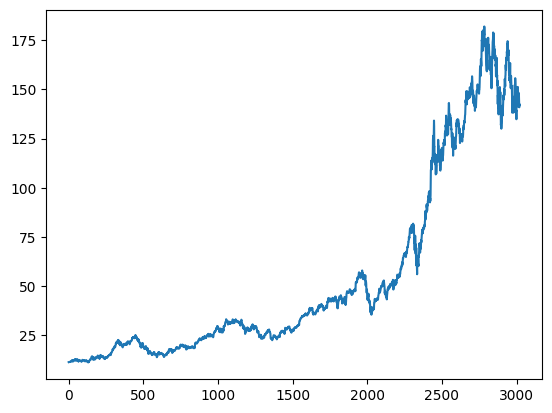

In [16]:
plt.plot(df.Close)

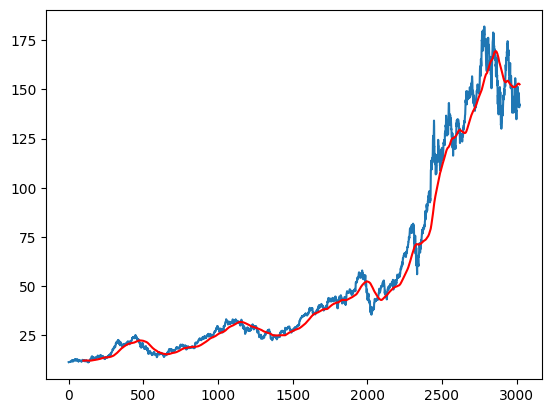

In [17]:
ma100 = df.Close.rolling(100).mean()
plt.plot(df.Close)
plt.plot(ma100, 'r')

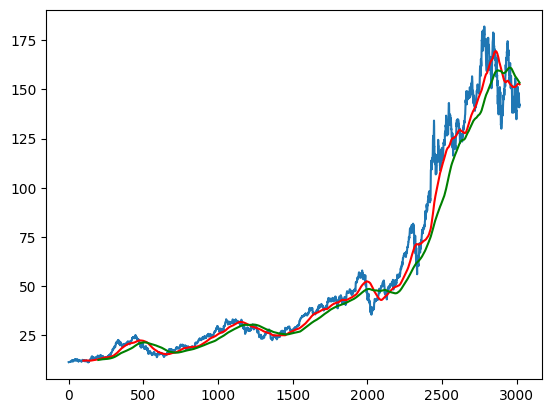

In [18]:
ma200 = df.Close.rolling(200).mean()
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [19]:
df.shape

(3021, 6)

In [20]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)
     

(2114, 1)
(907, 1)


In [21]:
data_training.head()

,Close
0,11.448571
1,11.488214
2,11.438929
3,11.441429
4,11.473214


In [22]:
data_testing.head()

,Close
2114,50.724998
2115,50.180000
2116,49.294998
2117,46.430000
2118,47.165001


In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array
     

array([[0.00400252],
       [0.00485039],
       [0.0037963 ],
       ...,
       [0.89135097],
       [0.87386659],
       [0.84381704]])

In [24]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])


In [25]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [26]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs= 100 )

Epoch 1/100
63/63 [==============================] - 33s 373ms/step - loss: 0.0395
Epoch 2/100
63/63 [==============================] - 22s 351ms/step - loss: 0.0072
Epoch 3/100
63/63 [==============================] - 25s 398ms/step - loss: 0.0071
Epoch 4/100
63/63 [==============================] - 22s 348ms/step - loss: 0.0055
Epoch 5/100
63/63 [==============================] - 24s 382ms/step - loss: 0.0056
Epoch 6/100
63/63 [==============================] - 22s 357ms/step - loss: 0.0052
Epoch 7/100
63/63 [==============================] - 23s 367ms/step - loss: 0.0055
Epoch 8/100
63/63 [==============================] - 24s 381ms/step - loss: 0.0053
Epoch 9/100
63/63 [==============================] - 22s 347ms/step - loss: 0.0051
Epoch 10/100
63/63 [==============================] - 24s 380ms/step - loss: 0.0045
Epoch 11/100
63/63 [==============================] - 22s 345ms/step - loss: 0.0044
Epoch 12/100
63/63 [==============================] - 24s 379ms/step - loss: 0.0044
E

In [29]:
model.save('keras_model.h5')

In [30]:
data_testing.head()

,Close
2114,50.724998
2115,50.180000
2116,49.294998
2117,46.430000
2118,47.165001


In [31]:
past_100 = data_training.tail(100)

In [32]:
final_df = past_100.append(data_testing, ignore_index=True)
final_df


<ipython-input-32-b35ee6602636>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100.append(data_testing, ignore_index=True)


,Close
0,42.275002
1,42.737499
2,41.369999
3,40.985001
4,41.517502
...,...
1002,146.630005
1003,142.910004
1004,140.940002
1005,142.649994


In [33]:
input_data = scaler.fit_transform(final_df)

In [34]:
input_data.shape

(1007, 1)

In [35]:
input_data

array([[0.04593327],
       [0.04909105],
       [0.03975419],
       ...,
       [0.71958696],
       [0.73126225],
       [0.72791675]])

In [36]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [38]:
print(x_test.shape)
print(y_test.shape)

(907, 100, 1)
(907,)


In [39]:
y_predicted= model.predict(x_test)
y_predicted.shape

29/29 [==============================] - 4s 99ms/step


(907, 1)

In [40]:
y_test

array([0.10362719, 0.09990612, 0.0938636 , 0.07430229, 0.07932065,
       0.08317828, 0.08174447, 0.07990099, 0.06981308, 0.0758044 ,
       0.06928394, 0.06395835, 0.06278057, 0.06151744, 0.06006657,
       0.06163694, 0.05612359, 0.05310233, 0.06392421, 0.06887427,
       0.07344883, 0.08186394, 0.08601177, 0.0898182 , 0.08875993,
       0.08869163, 0.08628489, 0.08824784, 0.0960314 , 0.09504138,
       0.09775541, 0.09659469, 0.0962533 , 0.09111548, 0.09833576,
       0.09823334, 0.09512674, 0.10132287, 0.10333702, 0.10620466,
       0.1058974 , 0.09871128, 0.10079372, 0.10419048, 0.10166425,
       0.10430998, 0.10757021, 0.10635828, 0.10439533, 0.10833832,
       0.10309805, 0.11100111, 0.11376631, 0.11347614, 0.11065973,
       0.11188871, 0.11520012, 0.1136639 , 0.12093538, 0.11306647,
       0.10553896, 0.08730903, 0.09355637, 0.09703847, 0.10453186,
       0.10036699, 0.09949645, 0.11398822, 0.10337117, 0.10164718,
       0.10977212, 0.11634379, 0.11636084, 0.12025262, 0.11994

In [41]:
y_predicted

array([[0.20247254],
       [0.20292228],
       [0.20288709],
       [0.20227522],
       [0.20078033],
       [0.19844288],
       [0.19562396],
       [0.19266528],
       [0.18979381],
       [0.1869309 ],
       [0.18422744],
       [0.18162988],
       [0.17902745],
       [0.17639726],
       [0.17376935],
       [0.17119303],
       [0.16878267],
       [0.16649404],
       [0.16427322],
       [0.16238116],
       [0.16101746],
       [0.16025427],
       [0.16018955],
       [0.16083542],
       [0.16215214],
       [0.16397691],
       [0.16611809],
       [0.16834629],
       [0.1705318 ],
       [0.17273271],
       [0.17493244],
       [0.17714575],
       [0.17931528],
       [0.18136914],
       [0.18314111],
       [0.1846934 ],
       [0.18606302],
       [0.18721226],
       [0.18825366],
       [0.18928134],
       [0.19038385],
       [0.19156106],
       [0.19262066],
       [0.19348615],
       [0.19419613],
       [0.19473621],
       [0.19517206],
       [0.195

In [42]:
scale_factor = 1/(scaler.scale_)
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

Text(0, 0.5, 'Price')

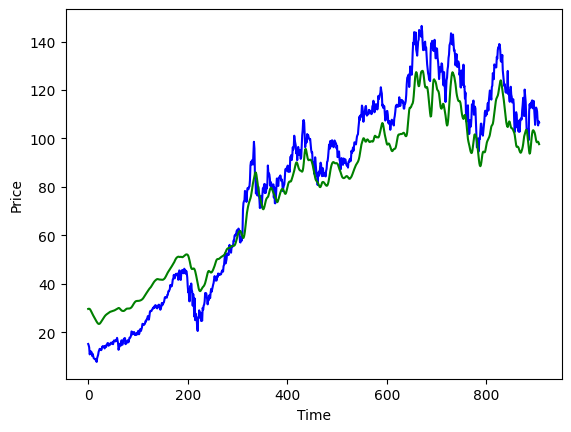

In [43]:
from cProfile import label

# plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'original price')
plt.plot(y_predicted, 'g',label='predicted price' )
plt.xlabel('Time')
plt.ylabel('Price')